In [3]:
import numpy as np
import torch
from torch import nn
import tqdm

In [2]:
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Subset
from sklearn.model_selection import train_test_split


In [6]:
# Use the following code to load and normalize the dataset for training and testing
# It will downlad the dataset into data subfolder (change to your data folder name)
train_dataset = torchvision.datasets.FashionMNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.FashionMNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)
                                           
num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)


print(num_train_batches)
print(num_val_batches)
print(num_test_batches)

for train_features, train_labels in train_batches:
    print(train_features.dtype)
    print(train_features.shape)

    print(train_labels.shape)
    print(train_labels.dtype)


#Sample code to visulaize the first sample in first 16 batches 
'''
batch_num = 0
for train_features, train_labels in train_batches:
    
    if batch_num == 16:
        break    # break here
    
    batch_num = batch_num +1
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    
    img = train_features[0].squeeze()
    label = train_labels[0]
    plt.imshow(img, cmap="gray")
    plt.show()
    print(f"Label: {label}")



#Sample code to plot N^2 images from the dataset
def plot_images(XX, N, title):
    fig, ax = plt.subplots(N, N, figsize=(8, 8))
    
    for i in range(N):
      for j in range(N):
        ax[i,j].imshow(XX[(N)*i+j], cmap="Greys")
        ax[i,j].axis("off")
    fig.suptitle(title, fontsize=24)

plot_images(train_dataset.data[:64], 8, "First 64 Training Images" )
'''
    

106
12
40
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28])
torch.Size([512])
torch.int64
torch.float32
torch.Size([512, 1, 28, 28]

'\nbatch_num = 0\nfor train_features, train_labels in train_batches:\n    \n    if batch_num == 16:\n        break    # break here\n    \n    batch_num = batch_num +1\n    print(f"Feature batch shape: {train_features.size()}")\n    print(f"Labels batch shape: {train_labels.size()}")\n    \n    img = train_features[0].squeeze()\n    label = train_labels[0]\n    plt.imshow(img, cmap="gray")\n    plt.show()\n    print(f"Label: {label}")\n\n\n\n#Sample code to plot N^2 images from the dataset\ndef plot_images(XX, N, title):\n    fig, ax = plt.subplots(N, N, figsize=(8, 8))\n    \n    for i in range(N):\n      for j in range(N):\n        ax[i,j].imshow(XX[(N)*i+j], cmap="Greys")\n        ax[i,j].axis("off")\n    fig.suptitle(title, fontsize=24)\n\nplot_images(train_dataset.data[:64], 8, "First 64 Training Images" )\n'

In [8]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


# three class initializers! 

class ACAIGFCN(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden): 
        super(ACAIGFCN, self).__init__()

        layers = []
        prev_dim = input_dim

        #Define the network layer(s) and activation function(s)
        for hidden_dim in hidden:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))
        self.model = nn.Sequential(*layers)
 
    def forward(self, x):
        #Define how your model propagates the input through the network

        return self.model(x) # output from second hidden layer! 
    
# separate initializer for dropout regularization 
class dropout_ACAIGFCN(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden, dropout_prob): 
        super(dropout_ACAIGFCN, self).__init__()

        layers = []
        prev_dim = input_dim

        #Define the network layer(s) and activation function(s)
        for hidden_dim in hidden:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(p=dropout_prob))
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))
        self.model = nn.Sequential(*layers)
 
    def forward(self, x):
        #Define how your model propagates the input through the network

        return self.model(x) # output from second hidden layer! 

# aaand one more for batch normalization
class batch_ACAIGFCN(nn.Module):
    #Initialize model layers, add additional arguments to adjust
    def __init__(self, input_dim, output_dim, hidden): 
        super(batch_ACAIGFCN, self).__init__()

        layers = []
        prev_dim = input_dim

        #Define the network layer(s) and activation function(s)
        for hidden_dim in hidden:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))
        self.model = nn.Sequential(*layers)
 
    def forward(self, x):
        #Define how your model propagates the input through the network

        return self.model(x) # output from second hidden layer!  

In [13]:
# helper functions to do initializations 
def init_rn_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,mean = 0, std=.01)
def init_xa_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_normal_(m.weight)
def init_he_weights(m):
    if type(m) == nn.Linear:
        nn.init.kaiming_normal_(m.weight)


# big model function!! does each variation depending on parameters
# spits out: training loss, training accuracy vs epoch; validation acc_vec 
def bigModel(hidden_vec, learning_rate, epochs, which_optim, dropout, which_init, which_norm):


    # Initialize neural network model with input, output and hidden layer dimensions
    if dropout < 1: # kind of arbitrary but trust (between 0-1 is the layer by layer dropout probability)
        model = dropout_ACAIGFCN(input_dim = 784, output_dim = 10, hidden = hidden_vec, dropout_prob=dropout) 
    elif which_norm =="Batch":
        model= batch_ACAIGFCN(input_dim = 784, output_dim = 10, hidden = hidden_vec)
    else:
        model = ACAIGFCN(input_dim = 784, output_dim = 10, hidden = hidden_vec)
    
    # edit the weights (if applicable)
    if which_init == "RandomNormal":
        model.apply(init_rn_weights)
    if which_init == "XavierNormal":
        model.apply(init_xa_weights)
    if which_init == "HeUniform":
        model.apply(init_he_weights)

    train_loss_list = np.zeros((epochs,))
    val_loss_list = np.zeros((epochs,))
    validation_accuracy_list = np.zeros((epochs,))

    # Define loss function  and optimizer
    loss_func = nn.CrossEntropyLoss() # Use Cross Entropy loss from torch.nn 

    if which_optim == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate)# Use optimizers from torch.optim
    elif which_optim == "RMSProp":
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate)
    elif which_optim == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    else:
        print("not a valid optimizer!")
    

    # Iterate over epochs, batches with progress bar and train+ validate the ACAIGFCN
    # Track the loss and validation accuracy
    for epoch in tqdm.trange(epochs):

        # ACAIGFCN Training 

        # keep track 
        batch_loss = 0

        # loop through each bit of the train_batch 
        for train_features, train_labels in train_batches:
            # Set model into training mode
            model.train()

            
            # Reshape images into a vector
            train_features = train_features.reshape(-1, 28*28)

            
            print("features:", train_features.dtype, train_features.shape)
            print("labels:",train_labels.dtype, train_labels.shape)

            # Reset gradients, Calculate training loss on model 
            optimizer.zero_grad() # reset gradients

            train_outputs = model(train_features)

            
            print("outputs:", train_outputs.dtype, train_outputs.shape)
            #     print(train_outputs)    
            loss = loss_func(train_outputs, train_labels) # calculate training loss
            #train_loss_list[epoch] = loss.item()

            
            # Perfrom optimization, back propagation
            loss.backward()
            
            optimizer.step()

            batch_loss += loss.item() 
    
        # Record loss for the epoch
        train_loss_list[epoch] = batch_loss / num_train_batches # mean of all 
        
        # ACAIGFCN Validation
        correct = 0
        total = 0 # need to keep track to do manually as we have different amounts in val batches!

        val_loss = 0

        for val_features, val_labels in val_batches:
            
            # Telling PyTorch we aren't passing inputs to network for training purpose
            with torch.no_grad(): 
                model.eval()
                
                # Reshape validation images into a vector
                val_features = val_features.reshape(-1, 28*28)
            
                # Compute validation outputs (targets) 
                val_outputs = model(val_features)
                # and compute accuracy 
                correct_vec = (torch.argmax(val_outputs, dim = 1) ==
                        val_labels).type(torch.FloatTensor)
                correct += correct_vec.sum().item()
                total += val_labels.size(0)

                # then keep track of loss
                loss = loss_func(val_outputs, val_labels)
                val_loss += loss.item()

        
        val_loss_list[epoch] = val_loss / num_val_batches # mean of all 

        # Record accuracy for the epoch; print training loss, validation accuracy
        val_acc = correct/total*100
        
        print("Epoch: "+ str(epoch) +"; Training Loss: " + str(train_loss_list[epoch]) + "; Validation Accuracy:" + str(val_acc) + '%')
        validation_accuracy_list[epoch] = val_acc


    #Calculate accuracy on test set

    # Telling PyTorch we aren't passing inputs to network for training purpose
    with torch.no_grad():
        
        acc_vec = []
        
        for test_features, test_labels in test_batches:

            model.eval()
            # Reshape test images into a vector
            test_features = test_features.reshape(-1, 28*28)

            # Compute validation outputs (targets)
            y_pred_test = model(test_features)
            correct_vec = (torch.argmax(y_pred_test, dim=1) == test_labels).type(torch.FloatTensor) 
            
            # and compute accuracy 
            acc_vec.append(correct_vec.sum().item() / test_labels.size(0))
            
        
        # Compute total (mean) accuracy
        acc = np.mean(acc_vec)

        # Report total (mean) accuracy, can also compute std based on batches
        print("Mean accuracy: "+ str(acc) + "with standard deviation: " + str(np.var(acc_vec)))

    train_loss_list = train_loss_list.reshape(epochs, 1)
    val_loss_list = val_loss_list.reshape(epochs,1)
    validation_accuracy_list = validation_accuracy_list.reshape(epochs, 1)
    
    return train_loss_list, val_loss_list, validation_accuracy_list,  acc_vec

In [9]:
import seaborn as sns

def plot_curves(train_loss_vec, val_loss_vec, validation_accuracy_vec, labels):
    # Plot training loss and validation accuracy throughout the training epochs
    plt.figure(figsize = (12, 6))

    plt.subplot(2, 1, 1)

    for i in range(np.shape(labels)[0]): # loop through a matrix of the train loss crap 
        plt.plot(train_loss_vec[:,i], linewidth = 3, label=labels[i])
        plt.plot(val_loss_vec[:,i], linewidth = 3, linestyle="--", label=labels[i] )
    plt.ylabel("loss", fontsize=20)
    #plt.xlabel("epochs", fontsize=20)
    plt.legend(fontsize=15,ncol=3)

    plt.subplot(2, 1, 2)
    for i in range(np.shape(labels)[0]):
        plt.plot(validation_accuracy_vec[:,i], linewidth = 3, label=labels[i])
    plt.ylabel("validation accuracy", fontsize=20)
    plt.xlabel("epochs", fontsize=20)
    plt.legend(fontsize=15)
    sns.despine()


In [14]:
## testing if i did my big function correctly 

train, vloss, vacc, tacc = bigModel([500, 50], 0.1, 15, "SGD", 1, "None", "None")

#vloss = vloss.reshape(15,1)

plot_curves(train, vloss, vacc, ["baseline"])

# above 85% accuracy!! 


  0%|          | 0/15 [00:00<?, ?it/s]

features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outputs: torch.float32 torch.Size([512, 10])
features: torch.float32 torch.Size([512, 784])
labels: torch.int64 torch.Size([512])
outpu

  0%|          | 0/15 [00:01<?, ?it/s]


KeyboardInterrupt: 

  7%|▋         | 1/15 [00:15<03:40, 15.77s/it]

Epoch: 0; Training Loss: 0.9026358138840154; Validation Accuracy:80.43333333333334%


 13%|█▎        | 2/15 [00:31<03:26, 15.86s/it]

Epoch: 1; Training Loss: 0.534753974597409; Validation Accuracy:82.51666666666667%


 20%|██        | 3/15 [00:46<03:05, 15.42s/it]

Epoch: 2; Training Loss: 0.46535341441631317; Validation Accuracy:84.91666666666666%


 27%|██▋       | 4/15 [01:01<02:48, 15.36s/it]

Epoch: 3; Training Loss: 0.42059055842318627; Validation Accuracy:86.1%


 33%|███▎      | 5/15 [01:17<02:34, 15.49s/it]

Epoch: 4; Training Loss: 0.39813691518216765; Validation Accuracy:85.38333333333334%


 40%|████      | 6/15 [01:34<02:24, 16.07s/it]

Epoch: 5; Training Loss: 0.3782666975034858; Validation Accuracy:86.23333333333333%


 47%|████▋     | 7/15 [01:52<02:12, 16.62s/it]

Epoch: 6; Training Loss: 0.3665295310740201; Validation Accuracy:87.18333333333334%


 53%|█████▎    | 8/15 [02:07<01:52, 16.09s/it]

Epoch: 7; Training Loss: 0.3520468310365137; Validation Accuracy:86.41666666666666%


 60%|██████    | 9/15 [02:22<01:34, 15.77s/it]

Epoch: 8; Training Loss: 0.3371554725574997; Validation Accuracy:86.88333333333334%


 67%|██████▋   | 10/15 [02:37<01:17, 15.44s/it]

Epoch: 9; Training Loss: 0.3276649393000693; Validation Accuracy:86.16666666666667%


 73%|███████▎  | 11/15 [02:52<01:00, 15.25s/it]

Epoch: 10; Training Loss: 0.3181365573743604; Validation Accuracy:87.15%


 80%|████████  | 12/15 [03:07<00:45, 15.19s/it]

Epoch: 11; Training Loss: 0.3109694168252765; Validation Accuracy:86.36666666666667%


 87%|████████▋ | 13/15 [03:21<00:30, 15.09s/it]

Epoch: 12; Training Loss: 0.30268891746143123; Validation Accuracy:88.26666666666667%


 93%|█████████▎| 14/15 [03:38<00:15, 15.42s/it]

Epoch: 13; Training Loss: 0.2935975597433324; Validation Accuracy:88.33333333333333%


100%|██████████| 15/15 [03:53<00:00, 15.54s/it]

Epoch: 14; Training Loss: 0.28755931176666943; Validation Accuracy:86.68333333333334%


Mean accuracy: 0.85068359375with standard deviation: 0.0005435848236083984


  7%|▋         | 1/15 [00:15<03:36, 15.46s/it]

Epoch: 0; Training Loss: 1.8800845528548618; Validation Accuracy:64.31666666666666%


 13%|█▎        | 2/15 [00:30<03:15, 15.02s/it]

Epoch: 1; Training Loss: 1.120827095126206; Validation Accuracy:69.15%


 20%|██        | 3/15 [00:46<03:06, 15.51s/it]

Epoch: 2; Training Loss: 0.8485142223115237; Validation Accuracy:73.38333333333334%


 27%|██▋       | 4/15 [01:01<02:50, 15.46s/it]

Epoch: 3; Training Loss: 0.7372769364770854; Validation Accuracy:75.94999999999999%


 33%|███▎      | 5/15 [01:16<02:32, 15.22s/it]

Epoch: 4; Training Loss: 0.6666631366846696; Validation Accuracy:77.21666666666667%


 40%|████      | 6/15 [01:31<02:17, 15.24s/it]

Epoch: 5; Training Loss: 0.6189689141399456; Validation Accuracy:79.4%


 47%|████▋     | 7/15 [01:47<02:03, 15.47s/it]

Epoch: 6; Training Loss: 0.5846614899500361; Validation Accuracy:79.85%


 53%|█████▎    | 8/15 [02:02<01:47, 15.35s/it]

Epoch: 7; Training Loss: 0.5585878679774842; Validation Accuracy:79.35%


 60%|██████    | 9/15 [02:17<01:30, 15.16s/it]

Epoch: 8; Training Loss: 0.5382402390241623; Validation Accuracy:79.85%


 67%|██████▋   | 10/15 [02:34<01:18, 15.62s/it]

Epoch: 9; Training Loss: 0.5219158988516286; Validation Accuracy:81.61666666666667%


 73%|███████▎  | 11/15 [02:52<01:06, 16.60s/it]

Epoch: 10; Training Loss: 0.509728619512522; Validation Accuracy:81.68333333333334%


 80%|████████  | 12/15 [03:09<00:49, 16.48s/it]

Epoch: 11; Training Loss: 0.4961476936092917; Validation Accuracy:82.3%


 87%|████████▋ | 13/15 [03:24<00:32, 16.16s/it]

Epoch: 12; Training Loss: 0.48703325610115844; Validation Accuracy:83.1%


 93%|█████████▎| 14/15 [03:39<00:15, 15.80s/it]

Epoch: 13; Training Loss: 0.4793669356490081; Validation Accuracy:82.73333333333333%


100%|██████████| 15/15 [03:54<00:00, 15.63s/it]

Epoch: 14; Training Loss: 0.47079968761722996; Validation Accuracy:83.53333333333333%


Mean accuracy: 0.8240234375with standard deviation: 0.0007644271850585938


  7%|▋         | 1/15 [00:15<03:32, 15.16s/it]

Epoch: 0; Training Loss: 2.281326988957963; Validation Accuracy:21.333333333333336%


 13%|█▎        | 2/15 [00:30<03:16, 15.12s/it]

Epoch: 1; Training Loss: 2.1821076105225763; Validation Accuracy:37.36666666666667%


 20%|██        | 3/15 [00:46<03:05, 15.49s/it]

Epoch: 2; Training Loss: 2.073643248036223; Validation Accuracy:42.8%


 27%|██▋       | 4/15 [01:01<02:47, 15.23s/it]

Epoch: 3; Training Loss: 1.9505859366003073; Validation Accuracy:48.38333333333333%


 33%|███▎      | 5/15 [01:15<02:31, 15.10s/it]

Epoch: 4; Training Loss: 1.8219365983639124; Validation Accuracy:55.98333333333333%


 40%|████      | 6/15 [01:31<02:18, 15.42s/it]

Epoch: 5; Training Loss: 1.6939494980956025; Validation Accuracy:60.56666666666667%


 47%|████▋     | 7/15 [01:47<02:02, 15.33s/it]

Epoch: 6; Training Loss: 1.5719566457676437; Validation Accuracy:62.949999999999996%


 53%|█████▎    | 8/15 [02:03<01:49, 15.63s/it]

Epoch: 7; Training Loss: 1.4608386923682015; Validation Accuracy:64.5%


 60%|██████    | 9/15 [02:18<01:32, 15.42s/it]

Epoch: 8; Training Loss: 1.361865889351323; Validation Accuracy:65.41666666666667%


 67%|██████▋   | 10/15 [02:33<01:16, 15.26s/it]

Epoch: 9; Training Loss: 1.2767127201242268; Validation Accuracy:65.85%


 73%|███████▎  | 11/15 [02:48<01:01, 15.41s/it]

Epoch: 10; Training Loss: 1.203757255707147; Validation Accuracy:66.5%


 80%|████████  | 12/15 [03:03<00:45, 15.26s/it]

Epoch: 11; Training Loss: 1.1419941816689834; Validation Accuracy:66.86666666666666%


 87%|████████▋ | 13/15 [03:18<00:30, 15.20s/it]

Epoch: 12; Training Loss: 1.0900172017655283; Validation Accuracy:67.26666666666667%


 93%|█████████▎| 14/15 [03:34<00:15, 15.41s/it]

Epoch: 13; Training Loss: 1.0450032949447632; Validation Accuracy:67.80000000000001%


100%|██████████| 15/15 [03:49<00:00, 15.30s/it]

Epoch: 14; Training Loss: 1.0066463570549804; Validation Accuracy:68.30000000000001%


Mean accuracy: 0.67216796875with standard deviation: 0.0010790920257568357


  7%|▋         | 1/15 [00:15<03:35, 15.39s/it]

Epoch: 0; Training Loss: 12.893659065354544; Validation Accuracy:28.7%


 13%|█▎        | 2/15 [00:32<03:33, 16.43s/it]

Epoch: 1; Training Loss: 1.992248869167184; Validation Accuracy:20.599999999999998%


 20%|██        | 3/15 [00:48<03:15, 16.30s/it]

Epoch: 2; Training Loss: 2.0090192747565934; Validation Accuracy:22.85%


 27%|██▋       | 4/15 [01:03<02:54, 15.90s/it]

Epoch: 3; Training Loss: 2.079925336927738; Validation Accuracy:17.5%


 33%|███▎      | 5/15 [01:19<02:36, 15.66s/it]

Epoch: 4; Training Loss: 2.1312522798214317; Validation Accuracy:11.916666666666668%


 40%|████      | 6/15 [01:34<02:20, 15.56s/it]

Epoch: 5; Training Loss: 2.267377149383977; Validation Accuracy:11.366666666666667%


 47%|████▋     | 7/15 [01:50<02:05, 15.72s/it]

Epoch: 6; Training Loss: 2.293548471522781; Validation Accuracy:11.516666666666667%


 53%|█████▎    | 8/15 [02:06<01:49, 15.62s/it]

Epoch: 7; Training Loss: 2.2816454464534544; Validation Accuracy:10.783333333333333%


 60%|██████    | 9/15 [02:21<01:33, 15.52s/it]

Epoch: 8; Training Loss: 2.2862199747337484; Validation Accuracy:10.8%


 67%|██████▋   | 10/15 [02:36<01:17, 15.42s/it]

Epoch: 9; Training Loss: 2.2841836079111637; Validation Accuracy:11.700000000000001%


 73%|███████▎  | 11/15 [02:53<01:03, 15.80s/it]

Epoch: 10; Training Loss: 2.3605390224816665; Validation Accuracy:11.35%


 80%|████████  | 12/15 [03:08<00:47, 15.68s/it]

Epoch: 11; Training Loss: 2.3201591248782174; Validation Accuracy:11.233333333333333%


 87%|████████▋ | 13/15 [03:23<00:31, 15.56s/it]

Epoch: 12; Training Loss: 2.27847084684192; Validation Accuracy:11.233333333333333%


 93%|█████████▎| 14/15 [03:39<00:15, 15.47s/it]

Epoch: 13; Training Loss: 2.27958651983513; Validation Accuracy:11.233333333333333%


100%|██████████| 15/15 [03:55<00:00, 15.70s/it]

Epoch: 14; Training Loss: 2.2786417592246577; Validation Accuracy:11.233333333333333%


Mean accuracy: 0.1134765625with standard deviation: 0.00037914276123046875


  7%|▋         | 1/15 [00:15<03:33, 15.27s/it]

Epoch: 0; Training Loss: 0.6309252325093971; Validation Accuracy:85.76666666666667%


 13%|█▎        | 2/15 [00:35<03:56, 18.15s/it]

Epoch: 1; Training Loss: 0.3606771807063301; Validation Accuracy:86.33333333333333%


 20%|██        | 3/15 [00:51<03:28, 17.39s/it]

Epoch: 2; Training Loss: 0.33006174103269037; Validation Accuracy:87.23333333333333%


 27%|██▋       | 4/15 [01:07<03:02, 16.62s/it]

Epoch: 3; Training Loss: 0.315712552728518; Validation Accuracy:87.48333333333333%


 33%|███▎      | 5/15 [01:23<02:43, 16.33s/it]

Epoch: 4; Training Loss: 0.2951925309761515; Validation Accuracy:89.08333333333334%


 40%|████      | 6/15 [01:38<02:25, 16.12s/it]

Epoch: 5; Training Loss: 0.2829142062450355; Validation Accuracy:88.5%


 47%|████▋     | 7/15 [01:54<02:06, 15.83s/it]

Epoch: 6; Training Loss: 0.2725838800927378; Validation Accuracy:88.78333333333333%


 53%|█████▎    | 8/15 [02:09<01:49, 15.71s/it]

Epoch: 7; Training Loss: 0.2647923858098264; Validation Accuracy:88.18333333333334%


 60%|██████    | 9/15 [02:24<01:33, 15.55s/it]

Epoch: 8; Training Loss: 0.25235664015108683; Validation Accuracy:88.55%


 67%|██████▋   | 10/15 [02:40<01:17, 15.53s/it]

Epoch: 9; Training Loss: 0.24542540592967338; Validation Accuracy:88.5%


 73%|███████▎  | 11/15 [02:56<01:03, 15.76s/it]

Epoch: 10; Training Loss: 0.24312642272913232; Validation Accuracy:88.33333333333333%


 80%|████████  | 12/15 [03:11<00:46, 15.60s/it]

Epoch: 11; Training Loss: 0.22819490829166375; Validation Accuracy:88.23333333333333%


 87%|████████▋ | 13/15 [03:27<00:30, 15.49s/it]

Epoch: 12; Training Loss: 0.2299369307902624; Validation Accuracy:89.14999999999999%


 93%|█████████▎| 14/15 [03:42<00:15, 15.40s/it]

Epoch: 13; Training Loss: 0.22462610014767018; Validation Accuracy:89.23333333333333%


100%|██████████| 15/15 [03:58<00:00, 15.89s/it]

Epoch: 14; Training Loss: 0.21275808423195244; Validation Accuracy:88.93333333333334%


Mean accuracy: 0.87744140625with standard deviation: 0.0005658626556396485


  7%|▋         | 1/15 [00:14<03:29, 14.94s/it]

Epoch: 0; Training Loss: 0.6159229779018546; Validation Accuracy:84.11666666666666%


 13%|█▎        | 2/15 [00:30<03:19, 15.31s/it]

Epoch: 1; Training Loss: 0.39086135631462315; Validation Accuracy:87.56666666666668%


 20%|██        | 3/15 [00:45<03:03, 15.30s/it]

Epoch: 2; Training Loss: 0.3448732813011925; Validation Accuracy:86.81666666666666%


 27%|██▋       | 4/15 [01:02<02:53, 15.82s/it]

Epoch: 3; Training Loss: 0.3166577624824812; Validation Accuracy:88.76666666666667%


 33%|███▎      | 5/15 [01:17<02:36, 15.69s/it]

Epoch: 4; Training Loss: 0.2940563753528415; Validation Accuracy:88.85%


 40%|████      | 6/15 [01:32<02:19, 15.49s/it]

Epoch: 5; Training Loss: 0.27411293899113276; Validation Accuracy:89.08333333333334%


 47%|████▋     | 7/15 [01:49<02:06, 15.82s/it]

Epoch: 6; Training Loss: 0.25950927624724945; Validation Accuracy:88.46666666666667%


 53%|█████▎    | 8/15 [02:04<01:49, 15.57s/it]

Epoch: 7; Training Loss: 0.24935531067960667; Validation Accuracy:89.4%


 60%|██████    | 9/15 [02:20<01:34, 15.71s/it]

Epoch: 8; Training Loss: 0.23348307398692617; Validation Accuracy:89.83333333333333%


 67%|██████▋   | 10/15 [02:36<01:18, 15.73s/it]

Epoch: 9; Training Loss: 0.2254454677678504; Validation Accuracy:88.96666666666667%


 73%|███████▎  | 11/15 [02:51<01:01, 15.48s/it]

Epoch: 10; Training Loss: 0.21224063227199158; Validation Accuracy:90.10000000000001%


 80%|████████  | 12/15 [03:06<00:46, 15.44s/it]

Epoch: 11; Training Loss: 0.20245225797846633; Validation Accuracy:90.23333333333333%


 87%|████████▋ | 13/15 [03:21<00:30, 15.29s/it]

Epoch: 12; Training Loss: 0.19395593497550712; Validation Accuracy:89.56666666666668%


 93%|█████████▎| 14/15 [03:36<00:15, 15.34s/it]

Epoch: 13; Training Loss: 0.18823830066424496; Validation Accuracy:88.68333333333334%


100%|██████████| 15/15 [03:53<00:00, 15.58s/it]

Epoch: 14; Training Loss: 0.18466208973583184; Validation Accuracy:90.08333333333334%


Mean accuracy: 0.88779296875with standard deviation: 0.0003883266448974609


  7%|▋         | 1/15 [00:15<03:36, 15.49s/it]

Epoch: 0; Training Loss: 12541.159666162617; Validation Accuracy:36.583333333333336%


 13%|█▎        | 2/15 [00:30<03:18, 15.25s/it]

Epoch: 1; Training Loss: 20.712132782306313; Validation Accuracy:29.883333333333333%


 20%|██        | 3/15 [00:45<03:01, 15.09s/it]

Epoch: 2; Training Loss: 10.468517676839289; Validation Accuracy:23.916666666666668%


 27%|██▋       | 4/15 [01:08<03:20, 18.26s/it]

Epoch: 3; Training Loss: 6.9888538347100315; Validation Accuracy:21.683333333333334%


 33%|███▎      | 5/15 [01:25<02:57, 17.70s/it]

Epoch: 4; Training Loss: 4.07245220328277; Validation Accuracy:21.683333333333334%


 40%|████      | 6/15 [01:40<02:32, 16.92s/it]

Epoch: 5; Training Loss: 3.346963603541536; Validation Accuracy:19.0%


 47%|████▋     | 7/15 [01:56<02:13, 16.71s/it]

Epoch: 6; Training Loss: 2.8347960530586964; Validation Accuracy:20.033333333333335%


 53%|█████▎    | 8/15 [02:12<01:53, 16.27s/it]

Epoch: 7; Training Loss: 2.733472618291963; Validation Accuracy:19.466666666666665%


 60%|██████    | 9/15 [02:27<01:35, 15.91s/it]

Epoch: 8; Training Loss: 4.07409863202077; Validation Accuracy:13.383333333333333%


 67%|██████▋   | 10/15 [02:43<01:19, 15.96s/it]

Epoch: 9; Training Loss: 7.509447477898508; Validation Accuracy:12.783333333333333%


 73%|███████▎  | 11/15 [02:59<01:03, 16.00s/it]

Epoch: 10; Training Loss: 2.652514543173448; Validation Accuracy:11.700000000000001%


 80%|████████  | 12/15 [03:16<00:48, 16.27s/it]

Epoch: 11; Training Loss: 2.5074355917156868; Validation Accuracy:11.716666666666667%


 87%|████████▋ | 13/15 [03:36<00:34, 17.44s/it]

Epoch: 12; Training Loss: 2.30134361869884; Validation Accuracy:12.033333333333333%


 93%|█████████▎| 14/15 [03:51<00:16, 16.82s/it]

Epoch: 13; Training Loss: 2.253275767812189; Validation Accuracy:12.366666666666665%


100%|██████████| 15/15 [04:07<00:00, 16.49s/it]

Epoch: 14; Training Loss: 2.2643612870630228; Validation Accuracy:11.866666666666667%


Mean accuracy: 0.1162109375with standard deviation: 0.0009595870971679688


  7%|▋         | 1/15 [00:15<03:34, 15.34s/it]

Epoch: 0; Training Loss: 12.948426951214952; Validation Accuracy:79.61666666666667%


 13%|█▎        | 2/15 [00:30<03:20, 15.43s/it]

Epoch: 1; Training Loss: 0.5089397107092839; Validation Accuracy:82.41666666666667%


 20%|██        | 3/15 [00:47<03:10, 15.85s/it]

Epoch: 2; Training Loss: 0.4734409417746202; Validation Accuracy:81.68333333333334%


 27%|██▋       | 4/15 [01:02<02:51, 15.63s/it]

Epoch: 3; Training Loss: 0.424648994263613; Validation Accuracy:81.71666666666667%


 33%|███▎      | 5/15 [01:18<02:36, 15.65s/it]

Epoch: 4; Training Loss: 0.41278997204213774; Validation Accuracy:85.36666666666667%


 40%|████      | 6/15 [01:33<02:19, 15.52s/it]

Epoch: 5; Training Loss: 0.4178785962878533; Validation Accuracy:73.96666666666667%


 47%|████▋     | 7/15 [01:49<02:05, 15.67s/it]

Epoch: 6; Training Loss: 0.4272127407339384; Validation Accuracy:83.2%


 53%|█████▎    | 8/15 [02:04<01:48, 15.57s/it]

Epoch: 7; Training Loss: 0.373352125005902; Validation Accuracy:76.05%


 60%|██████    | 9/15 [02:20<01:33, 15.53s/it]

Epoch: 8; Training Loss: 0.8113287316178376; Validation Accuracy:72.58333333333333%


 67%|██████▋   | 10/15 [02:35<01:17, 15.43s/it]

Epoch: 9; Training Loss: 0.493040660642228; Validation Accuracy:81.65%


 73%|███████▎  | 11/15 [02:51<01:02, 15.63s/it]

Epoch: 10; Training Loss: 0.38238458447861223; Validation Accuracy:82.93333333333334%


 80%|████████  | 12/15 [03:07<00:46, 15.64s/it]

Epoch: 11; Training Loss: 0.365057517053946; Validation Accuracy:85.85000000000001%


 87%|████████▋ | 13/15 [03:22<00:31, 15.65s/it]

Epoch: 12; Training Loss: 0.3905531480064932; Validation Accuracy:86.1%


 93%|█████████▎| 14/15 [03:39<00:15, 15.85s/it]

Epoch: 13; Training Loss: 0.34303567825623277; Validation Accuracy:86.46666666666667%


100%|██████████| 15/15 [03:54<00:00, 15.62s/it]

Epoch: 14; Training Loss: 0.3341298886346367; Validation Accuracy:86.45%


Mean accuracy: 0.85048828125with standard deviation: 0.000640859603881836


  7%|▋         | 1/15 [00:15<03:37, 15.53s/it]

Epoch: 0; Training Loss: 0.7102579260772129; Validation Accuracy:82.83333333333334%


 13%|█▎        | 2/15 [00:30<03:20, 15.41s/it]

Epoch: 1; Training Loss: 0.41233802488390003; Validation Accuracy:81.2%


 20%|██        | 3/15 [00:46<03:03, 15.30s/it]

Epoch: 2; Training Loss: 0.3666221873377854; Validation Accuracy:84.0%


 27%|██▋       | 4/15 [01:01<02:48, 15.33s/it]

Epoch: 3; Training Loss: 0.3417708710679468; Validation Accuracy:87.26666666666667%


 33%|███▎      | 5/15 [01:16<02:32, 15.26s/it]

Epoch: 4; Training Loss: 0.31760750275175526; Validation Accuracy:86.51666666666667%


 40%|████      | 6/15 [01:31<02:17, 15.28s/it]

Epoch: 5; Training Loss: 0.29713996682526933; Validation Accuracy:87.98333333333333%


 47%|████▋     | 7/15 [01:47<02:03, 15.39s/it]

Epoch: 6; Training Loss: 0.2815969558256977; Validation Accuracy:88.86666666666667%


 53%|█████▎    | 8/15 [02:03<01:49, 15.58s/it]

Epoch: 7; Training Loss: 0.2740277202343041; Validation Accuracy:88.46666666666667%


 60%|██████    | 9/15 [02:18<01:33, 15.53s/it]

Epoch: 8; Training Loss: 0.25521365103294263; Validation Accuracy:88.78333333333333%


 67%|██████▋   | 10/15 [02:34<01:17, 15.47s/it]

Epoch: 9; Training Loss: 0.24263226634488916; Validation Accuracy:88.66666666666667%


 73%|███████▎  | 11/15 [02:50<01:02, 15.62s/it]

Epoch: 10; Training Loss: 0.2351236292776072; Validation Accuracy:88.91666666666667%


 80%|████████  | 12/15 [03:05<00:46, 15.58s/it]

Epoch: 11; Training Loss: 0.22300806838386464; Validation Accuracy:88.38333333333334%


 87%|████████▋ | 13/15 [03:20<00:30, 15.46s/it]

Epoch: 12; Training Loss: 0.21537250378784142; Validation Accuracy:88.6%


 93%|█████████▎| 14/15 [03:36<00:15, 15.43s/it]

Epoch: 13; Training Loss: 0.2033453774902056; Validation Accuracy:89.91666666666667%


100%|██████████| 15/15 [03:54<00:00, 15.61s/it]


Epoch: 14; Training Loss: 0.19293901521079945; Validation Accuracy:87.11666666666666%
Mean accuracy: 0.85771484375with standard deviation: 0.0010893917083740234


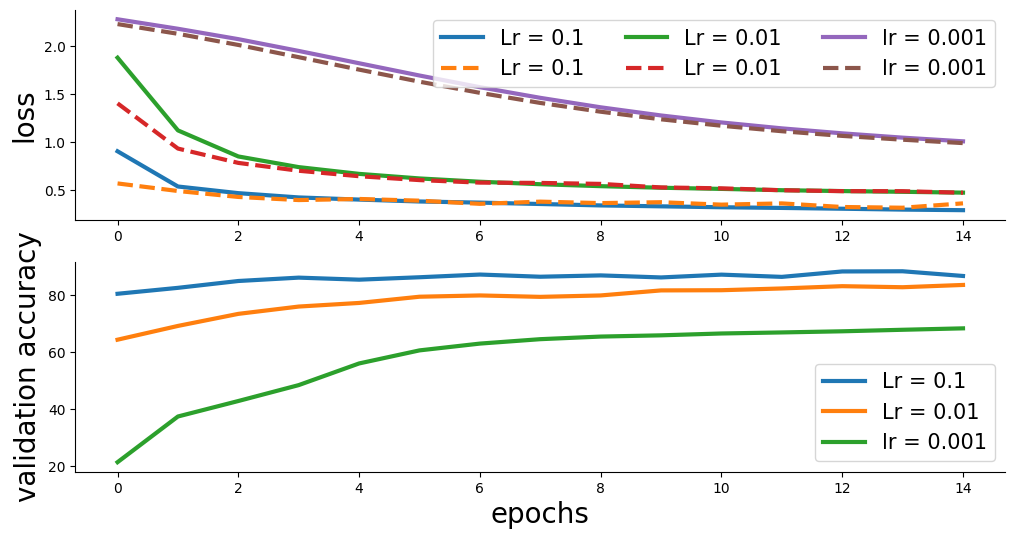

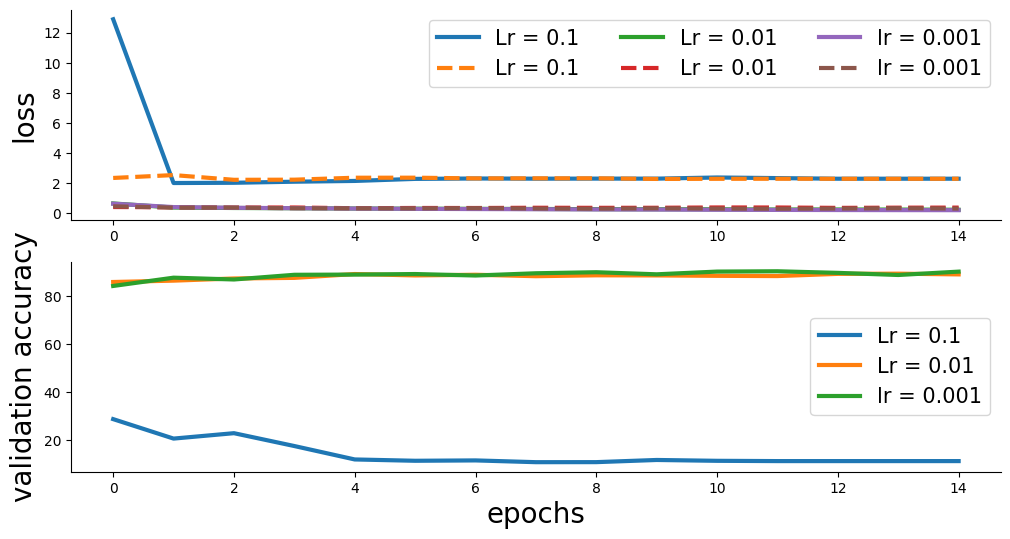

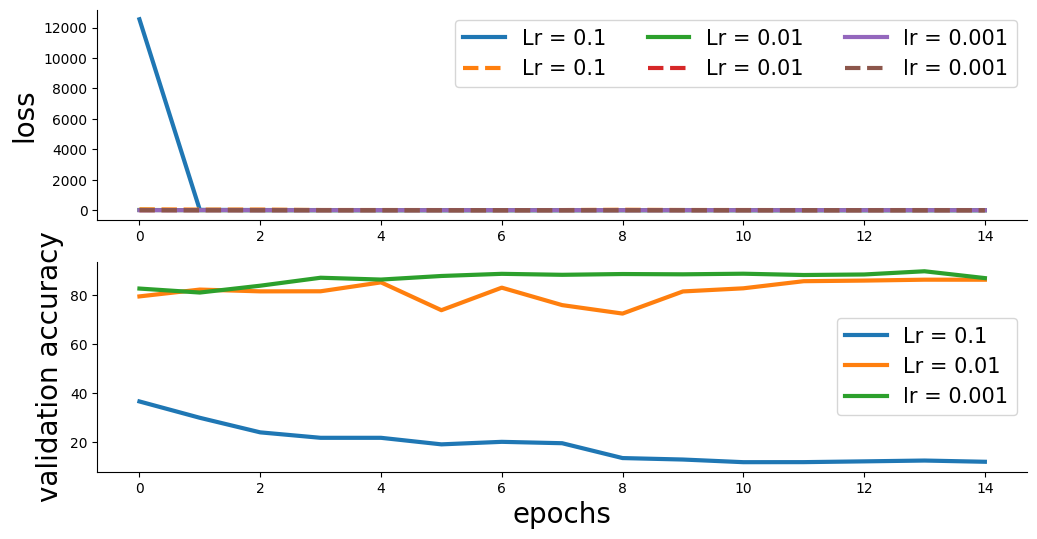

In [69]:
# part 2 (a)

# initialize all the crap 

# for each optimizer method
for optimizer in ["SGD", "Adam", "RMSProp"]:
    # do for each optimizer method 

    train_1, vloss_1, vacc_1, acc = bigModel([500, 50], .1, 15, optimizer, 1, "None", "None")
    train_01, vloss_01, vacc_01, acc = bigModel([500, 50], .01, 15, optimizer, 1,"None","None")
    train_001, vloss_001, vacc_001, acc = bigModel([500, 50], .001, 15, optimizer, 1,"None","None")

    plot_curves(np.hstack((train_1, train_01, train_001)), 
                np.hstack((vloss_1, vloss_01, vloss_001)),
                np.hstack((vacc_1, vacc_01, vacc_001)),
                ["Lr = 0.1", "Lr = 0.01", "lr = 0.001"])


  7%|▋         | 1/15 [00:15<03:33, 15.22s/it]

Epoch: 0; Training Loss: 1.0903016913611934; Validation Accuracy:77.16666666666666%


 13%|█▎        | 2/15 [00:31<03:23, 15.62s/it]

Epoch: 1; Training Loss: 0.683121144209268; Validation Accuracy:81.95%


 20%|██        | 3/15 [00:47<03:10, 15.84s/it]

Epoch: 2; Training Loss: 0.5938830932356277; Validation Accuracy:83.21666666666667%


 27%|██▋       | 4/15 [01:02<02:50, 15.54s/it]

Epoch: 3; Training Loss: 0.5508544416922443; Validation Accuracy:84.3%


 33%|███▎      | 5/15 [01:17<02:33, 15.39s/it]

Epoch: 4; Training Loss: 0.5192132386958824; Validation Accuracy:84.43333333333334%


 40%|████      | 6/15 [01:32<02:18, 15.43s/it]

Epoch: 5; Training Loss: 0.4961141620604497; Validation Accuracy:85.56666666666666%


 47%|████▋     | 7/15 [01:48<02:02, 15.31s/it]

Epoch: 6; Training Loss: 0.480987937382932; Validation Accuracy:85.51666666666667%


 53%|█████▎    | 8/15 [02:03<01:47, 15.31s/it]

Epoch: 7; Training Loss: 0.4658523007946194; Validation Accuracy:85.8%


 60%|██████    | 9/15 [02:18<01:31, 15.25s/it]

Epoch: 8; Training Loss: 0.45751307623566323; Validation Accuracy:86.81666666666666%


 67%|██████▋   | 10/15 [02:33<01:16, 15.28s/it]

Epoch: 9; Training Loss: 0.4423721134662628; Validation Accuracy:86.56666666666666%


 73%|███████▎  | 11/15 [02:48<01:00, 15.22s/it]

Epoch: 10; Training Loss: 0.4366596883760308; Validation Accuracy:86.93333333333332%


 80%|████████  | 12/15 [03:05<00:46, 15.52s/it]

Epoch: 11; Training Loss: 0.4253243309146953; Validation Accuracy:86.61666666666666%


 87%|████████▋ | 13/15 [03:20<00:30, 15.45s/it]

Epoch: 12; Training Loss: 0.420720027302796; Validation Accuracy:86.45%


 93%|█████████▎| 14/15 [03:35<00:15, 15.37s/it]

Epoch: 13; Training Loss: 0.41169350130378074; Validation Accuracy:87.45%


100%|██████████| 15/15 [03:50<00:00, 15.40s/it]

Epoch: 14; Training Loss: 0.40594820593887904; Validation Accuracy:87.76666666666667%


Mean accuracy: 0.8666015625with standard deviation: 0.0008083724975585937


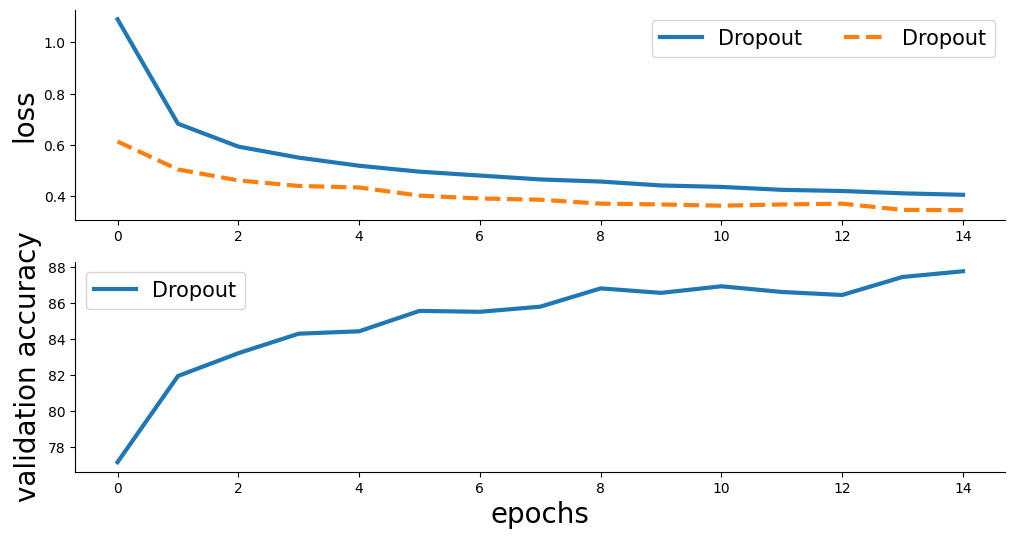

In [70]:
# part 2(b) dropout regularization 
optimizer = "SGD"
train, vloss,vacc, acc = bigModel([500, 50], .1, 15, optimizer, .5, "None", "None")

plot_curves(train, vloss,vacc,
                ["Dropout"])

  7%|▋         | 1/15 [00:15<03:33, 15.28s/it]

Epoch: 0; Training Loss: 1.7346315541357364; Validation Accuracy:57.53333333333334%


 13%|█▎        | 2/15 [00:30<03:18, 15.24s/it]

Epoch: 1; Training Loss: 0.8486960901404327; Validation Accuracy:72.05%


 20%|██        | 3/15 [00:45<03:03, 15.33s/it]

Epoch: 2; Training Loss: 0.6544637367972788; Validation Accuracy:79.63333333333334%


 27%|██▋       | 4/15 [01:01<02:51, 15.58s/it]

Epoch: 3; Training Loss: 0.5349408185706949; Validation Accuracy:82.18333333333334%


 33%|███▎      | 5/15 [01:17<02:34, 15.48s/it]

Epoch: 4; Training Loss: 0.4811823030687728; Validation Accuracy:83.0%


 40%|████      | 6/15 [01:32<02:18, 15.39s/it]

Epoch: 5; Training Loss: 0.4413285958317091; Validation Accuracy:84.55%


 47%|████▋     | 7/15 [01:48<02:04, 15.56s/it]

Epoch: 6; Training Loss: 0.4169805749969662; Validation Accuracy:82.69999999999999%


 53%|█████▎    | 8/15 [02:03<01:47, 15.39s/it]

Epoch: 7; Training Loss: 0.3966504211695689; Validation Accuracy:85.73333333333333%


 60%|██████    | 9/15 [02:18<01:31, 15.33s/it]

Epoch: 8; Training Loss: 0.37949695339742695; Validation Accuracy:86.0%


 67%|██████▋   | 10/15 [02:33<01:16, 15.29s/it]

Epoch: 9; Training Loss: 0.3708188123298141; Validation Accuracy:86.43333333333332%


 73%|███████▎  | 11/15 [02:49<01:01, 15.30s/it]

Epoch: 10; Training Loss: 0.3534664506057523; Validation Accuracy:85.43333333333332%


 80%|████████  | 12/15 [03:03<00:45, 15.17s/it]

Epoch: 11; Training Loss: 0.3444397677228136; Validation Accuracy:87.08333333333333%


 87%|████████▋ | 13/15 [03:19<00:30, 15.19s/it]

Epoch: 12; Training Loss: 0.33439847742611506; Validation Accuracy:86.65%


 93%|█████████▎| 14/15 [03:34<00:15, 15.18s/it]

Epoch: 13; Training Loss: 0.32716154068146114; Validation Accuracy:87.51666666666667%


100%|██████████| 15/15 [03:49<00:00, 15.28s/it]

Epoch: 14; Training Loss: 0.3204352227303217; Validation Accuracy:87.7%


Mean accuracy: 0.86708984375with standard deviation: 0.0008296871185302736


  7%|▋         | 1/15 [00:16<03:48, 16.29s/it]

Epoch: 0; Training Loss: 0.7299362426658846; Validation Accuracy:80.83333333333333%


 13%|█▎        | 2/15 [00:31<03:20, 15.45s/it]

Epoch: 1; Training Loss: 0.4671811506433307; Validation Accuracy:84.26666666666667%


 20%|██        | 3/15 [00:46<03:03, 15.30s/it]

Epoch: 2; Training Loss: 0.41275890677605037; Validation Accuracy:84.83333333333334%


 27%|██▋       | 4/15 [01:01<02:46, 15.16s/it]

Epoch: 3; Training Loss: 0.3787030763221237; Validation Accuracy:86.05000000000001%


 33%|███▎      | 5/15 [01:17<02:34, 15.49s/it]

Epoch: 4; Training Loss: 0.35790585065787694; Validation Accuracy:86.15%


 40%|████      | 6/15 [01:32<02:18, 15.36s/it]

Epoch: 5; Training Loss: 0.34257114439640407; Validation Accuracy:87.28333333333333%


 47%|████▋     | 7/15 [01:47<02:01, 15.24s/it]

Epoch: 6; Training Loss: 0.3247934061120141; Validation Accuracy:88.16666666666667%


 53%|█████▎    | 8/15 [02:02<01:46, 15.20s/it]

Epoch: 7; Training Loss: 0.3104125219133665; Validation Accuracy:87.63333333333333%


 60%|██████    | 9/15 [02:18<01:32, 15.46s/it]

Epoch: 8; Training Loss: 0.29894041607402405; Validation Accuracy:87.18333333333334%


 67%|██████▋   | 10/15 [02:34<01:17, 15.50s/it]

Epoch: 9; Training Loss: 0.2912907004356384; Validation Accuracy:88.58333333333334%


 73%|███████▎  | 11/15 [02:49<01:01, 15.39s/it]

Epoch: 10; Training Loss: 0.28540330211508946; Validation Accuracy:87.55%


 80%|████████  | 12/15 [03:05<00:46, 15.53s/it]

Epoch: 11; Training Loss: 0.2763603704999078; Validation Accuracy:88.16666666666667%


 87%|████████▋ | 13/15 [03:20<00:30, 15.45s/it]

Epoch: 12; Training Loss: 0.26312764804318267; Validation Accuracy:86.45%


 93%|█████████▎| 14/15 [03:35<00:15, 15.28s/it]

Epoch: 13; Training Loss: 0.26077068906347706; Validation Accuracy:88.8%


100%|██████████| 15/15 [03:50<00:00, 15.38s/it]

Epoch: 14; Training Loss: 0.2522366249336387; Validation Accuracy:88.81666666666666%


Mean accuracy: 0.8755859375with standard deviation: 0.0008182907104492187


  7%|▋         | 1/15 [00:15<03:30, 15.00s/it]

Epoch: 0; Training Loss: 0.8849126269232552; Validation Accuracy:81.01666666666667%


 13%|█▎        | 2/15 [00:30<03:15, 15.01s/it]

Epoch: 1; Training Loss: 0.46971847060716376; Validation Accuracy:83.83333333333334%


 20%|██        | 3/15 [00:44<02:59, 14.99s/it]

Epoch: 2; Training Loss: 0.4155595122643237; Validation Accuracy:85.33333333333334%


 27%|██▋       | 4/15 [01:00<02:46, 15.16s/it]

Epoch: 3; Training Loss: 0.382807713072255; Validation Accuracy:86.2%


 33%|███▎      | 5/15 [01:15<02:33, 15.32s/it]

Epoch: 4; Training Loss: 0.3580636022225866; Validation Accuracy:86.73333333333333%


 40%|████      | 6/15 [01:31<02:18, 15.37s/it]

Epoch: 5; Training Loss: 0.3421992722828433; Validation Accuracy:87.21666666666667%


 47%|████▋     | 7/15 [01:46<02:02, 15.27s/it]

Epoch: 6; Training Loss: 0.3281199856186813; Validation Accuracy:87.51666666666667%


 53%|█████▎    | 8/15 [02:01<01:46, 15.19s/it]

Epoch: 7; Training Loss: 0.31515762519161655; Validation Accuracy:87.66666666666667%


 60%|██████    | 9/15 [02:17<01:32, 15.40s/it]

Epoch: 8; Training Loss: 0.3048639273587263; Validation Accuracy:86.98333333333333%


 67%|██████▋   | 10/15 [02:32<01:16, 15.32s/it]

Epoch: 9; Training Loss: 0.2950954255911539; Validation Accuracy:87.83333333333333%


 73%|███████▎  | 11/15 [02:47<01:01, 15.28s/it]

Epoch: 10; Training Loss: 0.28696336808069695; Validation Accuracy:87.94999999999999%


 80%|████████  | 12/15 [03:02<00:45, 15.21s/it]

Epoch: 11; Training Loss: 0.27800269410857614; Validation Accuracy:88.33333333333333%


 87%|████████▋ | 13/15 [03:18<00:30, 15.48s/it]

Epoch: 12; Training Loss: 0.26900363671329786; Validation Accuracy:87.08333333333333%


 93%|█████████▎| 14/15 [03:34<00:15, 15.39s/it]

Epoch: 13; Training Loss: 0.25898129057209446; Validation Accuracy:88.08333333333334%


100%|██████████| 15/15 [03:49<00:00, 15.30s/it]

Epoch: 14; Training Loss: 0.2539823368754027; Validation Accuracy:88.44999999999999%


Mean accuracy: 0.87158203125with standard deviation: 0.0007745265960693359


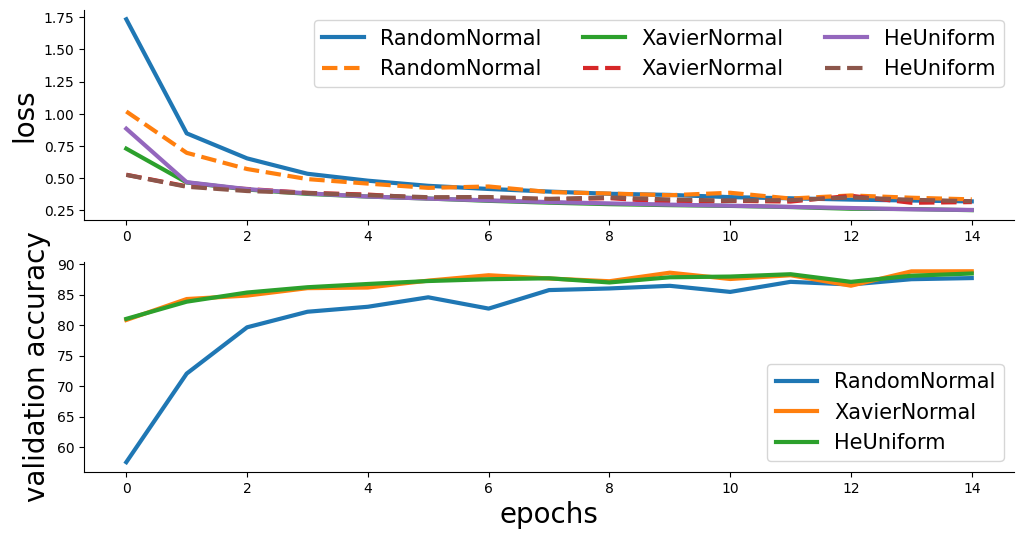

In [71]:
# part 2(c) different initializations 

initializers = ["RandomNormal", "XavierNormal", "HeUniform"]

train_0, vloss_0, vacc_0, acc = bigModel([500,50],.1, 15, "SGD", 1, initializers[0], "None")
train_1, vloss_1, vacc_1, acc = bigModel([500,50],.1, 15, "SGD", 1, initializers[1], "None")
train_2, vloss_2, vacc_2, acc = bigModel([500,50],.1, 15, "SGD", 1, initializers[2], "None")

plot_curves(np.hstack((train_0, train_1, train_2)), np.hstack((vloss_0, vloss_1, vloss_2)),
            np.hstack((vacc_0, vacc_1, vacc_2)), initializers)

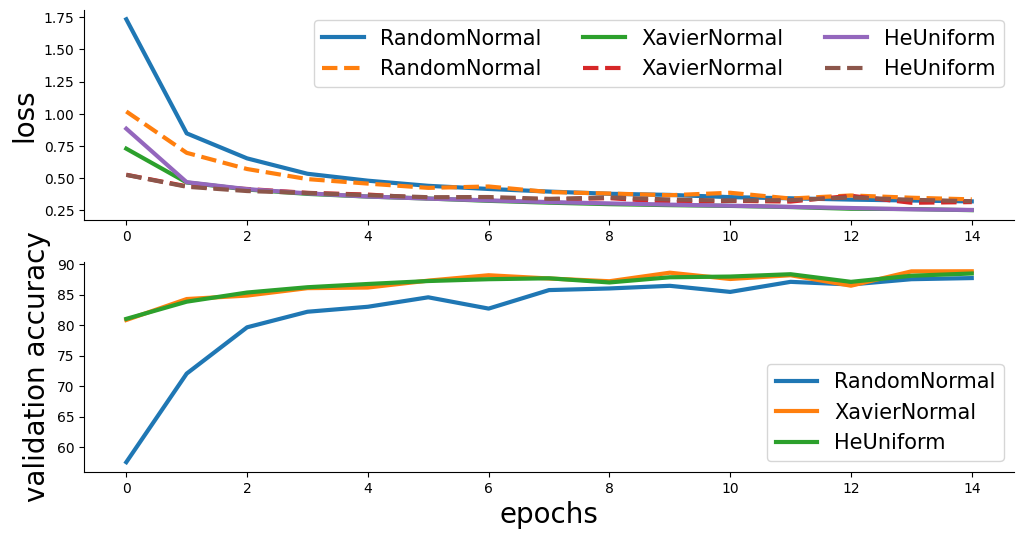

In [72]:
plot_curves(np.hstack((train_0, train_1, train_2)), np.hstack((vloss_0, vloss_1, vloss_2)),
            np.hstack((vacc_0, vacc_1, vacc_2)), initializers)

  7%|▋         | 1/15 [00:16<03:54, 16.76s/it]

Epoch: 0; Training Loss: 0.6614558561792914; Validation Accuracy:84.41666666666666%


 13%|█▎        | 2/15 [00:32<03:26, 15.90s/it]

Epoch: 1; Training Loss: 0.38806178322378193; Validation Accuracy:84.78333333333333%


 20%|██        | 3/15 [00:47<03:10, 15.87s/it]

Epoch: 2; Training Loss: 0.33901418857979326; Validation Accuracy:86.78333333333333%


 27%|██▋       | 4/15 [01:03<02:51, 15.61s/it]

Epoch: 3; Training Loss: 0.30721897800576015; Validation Accuracy:82.5%


 33%|███▎      | 5/15 [01:18<02:34, 15.46s/it]

Epoch: 4; Training Loss: 0.2838907686044585; Validation Accuracy:85.73333333333333%


 40%|████      | 6/15 [01:33<02:18, 15.42s/it]

Epoch: 5; Training Loss: 0.26380866006860193; Validation Accuracy:88.13333333333333%


 47%|████▋     | 7/15 [01:49<02:03, 15.44s/it]

Epoch: 6; Training Loss: 0.24937796747347094; Validation Accuracy:78.11666666666667%


 53%|█████▎    | 8/15 [02:04<01:48, 15.44s/it]

Epoch: 7; Training Loss: 0.23348083993736304; Validation Accuracy:87.7%


 60%|██████    | 9/15 [02:19<01:31, 15.32s/it]

Epoch: 8; Training Loss: 0.2214551934937261; Validation Accuracy:87.94999999999999%


 67%|██████▋   | 10/15 [02:36<01:18, 15.68s/it]

Epoch: 9; Training Loss: 0.207793690545379; Validation Accuracy:85.41666666666666%


 73%|███████▎  | 11/15 [02:50<01:01, 15.40s/it]

Epoch: 10; Training Loss: 0.19952652561214734; Validation Accuracy:87.55%


 80%|████████  | 12/15 [03:06<00:46, 15.34s/it]

Epoch: 11; Training Loss: 0.19691410154666542; Validation Accuracy:85.76666666666667%


 87%|████████▋ | 13/15 [03:21<00:30, 15.30s/it]

Epoch: 12; Training Loss: 0.17940781996497568; Validation Accuracy:87.3%


 93%|█████████▎| 14/15 [03:37<00:15, 15.60s/it]

Epoch: 13; Training Loss: 0.16993263124857308; Validation Accuracy:88.58333333333334%


100%|██████████| 15/15 [03:52<00:00, 15.52s/it]

Epoch: 14; Training Loss: 0.16317734916536314; Validation Accuracy:86.8%


Mean accuracy: 0.8599609375with standard deviation: 0.0009609603881835937


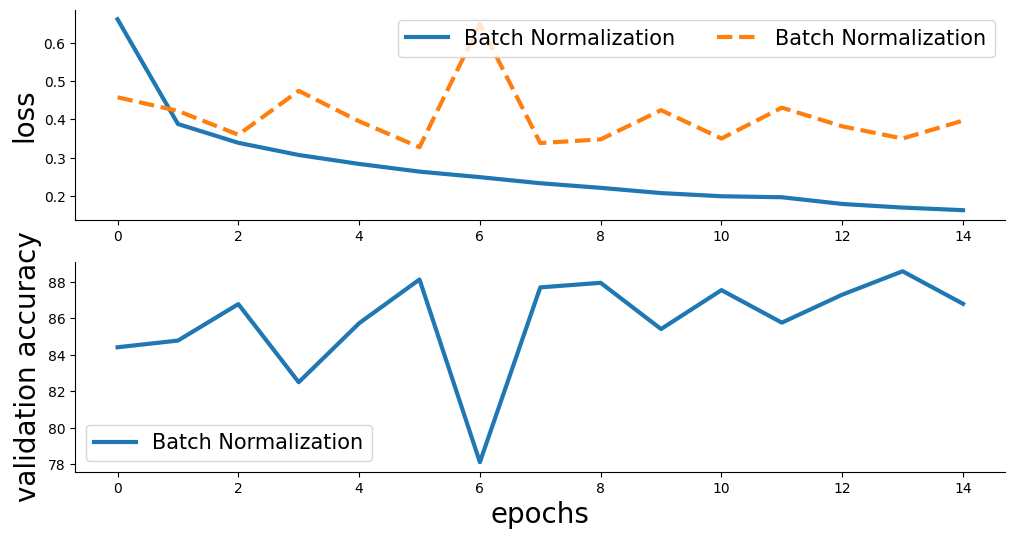

In [73]:
# part 2(d) batch normalization 
optimizer = "SGD"
train, vloss, vacc, acc = bigModel([500, 50], .1, 15, optimizer, 1, "None", "Batch")

plot_curves(train, vloss, vacc,
                ["Batch Normalization"])

  1%|▏         | 1/70 [00:16<19:04, 16.59s/it]

Epoch: 0; Training Loss: 0.8846230658720124; Validation Accuracy:81.06666666666666%


  3%|▎         | 2/70 [00:34<19:24, 17.13s/it]

Epoch: 1; Training Loss: 0.585153302212931; Validation Accuracy:84.83333333333334%


  4%|▍         | 3/70 [00:50<18:51, 16.89s/it]

Epoch: 2; Training Loss: 0.5205223093617637; Validation Accuracy:85.86666666666667%


  6%|▌         | 4/70 [01:07<18:24, 16.74s/it]

Epoch: 3; Training Loss: 0.4731787684953438; Validation Accuracy:86.41666666666666%


  7%|▋         | 5/70 [01:24<18:27, 17.03s/it]

Epoch: 4; Training Loss: 0.4432182421661773; Validation Accuracy:87.1%


  9%|▊         | 6/70 [01:41<17:54, 16.79s/it]

Epoch: 5; Training Loss: 0.4242599094813725; Validation Accuracy:87.01666666666667%


 10%|█         | 7/70 [01:58<17:43, 16.88s/it]

Epoch: 6; Training Loss: 0.4028094132553856; Validation Accuracy:87.43333333333332%


 11%|█▏        | 8/70 [02:14<17:25, 16.86s/it]

Epoch: 7; Training Loss: 0.3878942680246425; Validation Accuracy:87.45%


 13%|█▎        | 9/70 [02:31<16:59, 16.72s/it]

Epoch: 8; Training Loss: 0.374381349334177; Validation Accuracy:88.11666666666666%


 14%|█▍        | 10/70 [02:47<16:40, 16.67s/it]

Epoch: 9; Training Loss: 0.3593669140113975; Validation Accuracy:88.25%


 16%|█▌        | 11/70 [03:04<16:20, 16.62s/it]

Epoch: 10; Training Loss: 0.34941995621852157; Validation Accuracy:88.35%


 17%|█▋        | 12/70 [03:20<16:01, 16.57s/it]

Epoch: 11; Training Loss: 0.3407889060535521; Validation Accuracy:88.76666666666667%


 19%|█▊        | 13/70 [03:38<16:01, 16.87s/it]

Epoch: 12; Training Loss: 0.33170927864200667; Validation Accuracy:88.61666666666666%


 20%|██        | 14/70 [03:55<15:47, 16.92s/it]

Epoch: 13; Training Loss: 0.32309668975056344; Validation Accuracy:89.03333333333333%


 21%|██▏       | 15/70 [04:13<15:45, 17.19s/it]

Epoch: 14; Training Loss: 0.31398845140664083; Validation Accuracy:89.13333333333333%


 23%|██▎       | 16/70 [04:29<15:18, 17.00s/it]

Epoch: 15; Training Loss: 0.30809113158369966; Validation Accuracy:88.83333333333333%


 24%|██▍       | 17/70 [04:46<14:48, 16.77s/it]

Epoch: 16; Training Loss: 0.2987200582645974; Validation Accuracy:89.0%


 26%|██▌       | 18/70 [05:02<14:30, 16.74s/it]

Epoch: 17; Training Loss: 0.2894385646817819; Validation Accuracy:89.1%


 27%|██▋       | 19/70 [05:18<14:05, 16.57s/it]

Epoch: 18; Training Loss: 0.28555785991110894; Validation Accuracy:89.35%


 29%|██▊       | 20/70 [05:36<13:59, 16.80s/it]

Epoch: 19; Training Loss: 0.28233692359249546; Validation Accuracy:89.38333333333334%


 30%|███       | 21/70 [05:53<13:48, 16.90s/it]

Epoch: 20; Training Loss: 0.2733416831437147; Validation Accuracy:89.3%


 31%|███▏      | 22/70 [06:10<13:38, 17.06s/it]

Epoch: 21; Training Loss: 0.2690322223418164; Validation Accuracy:89.16666666666667%


 33%|███▎      | 23/70 [06:27<13:19, 17.02s/it]

Epoch: 22; Training Loss: 0.26321362507230833; Validation Accuracy:89.9%


 34%|███▍      | 24/70 [06:44<12:52, 16.80s/it]

Epoch: 23; Training Loss: 0.2606984777551777; Validation Accuracy:89.68333333333334%


 36%|███▌      | 25/70 [07:00<12:32, 16.71s/it]

Epoch: 24; Training Loss: 0.2530548507874867; Validation Accuracy:89.76666666666667%


 37%|███▋      | 26/70 [07:17<12:13, 16.68s/it]

Epoch: 25; Training Loss: 0.24746361515432033; Validation Accuracy:89.91666666666667%


 39%|███▊      | 27/70 [07:33<11:50, 16.52s/it]

Epoch: 26; Training Loss: 0.2450479302766188; Validation Accuracy:89.56666666666668%


 40%|████      | 28/70 [07:50<11:36, 16.58s/it]

Epoch: 27; Training Loss: 0.23606047146725204; Validation Accuracy:89.56666666666668%


 41%|████▏     | 29/70 [08:06<11:16, 16.51s/it]

Epoch: 28; Training Loss: 0.2344801827984036; Validation Accuracy:89.35%


 43%|████▎     | 30/70 [08:23<11:11, 16.78s/it]

Epoch: 29; Training Loss: 0.2314240575399039; Validation Accuracy:90.23333333333333%


 44%|████▍     | 31/70 [08:40<10:53, 16.76s/it]

Epoch: 30; Training Loss: 0.2295931101126491; Validation Accuracy:89.95%


 46%|████▌     | 32/70 [08:56<10:32, 16.63s/it]

Epoch: 31; Training Loss: 0.22307192210881216; Validation Accuracy:89.95%


 47%|████▋     | 33/70 [09:14<10:28, 17.00s/it]

Epoch: 32; Training Loss: 0.21866715825953573; Validation Accuracy:89.9%


 49%|████▊     | 34/70 [09:31<10:04, 16.80s/it]

Epoch: 33; Training Loss: 0.21500756563443058; Validation Accuracy:89.71666666666667%


 50%|█████     | 35/70 [09:47<09:45, 16.73s/it]

Epoch: 34; Training Loss: 0.21283136547174095; Validation Accuracy:89.73333333333333%


 51%|█████▏    | 36/70 [10:04<09:27, 16.69s/it]

Epoch: 35; Training Loss: 0.20915945759921703; Validation Accuracy:89.64999999999999%


 53%|█████▎    | 37/70 [10:21<09:15, 16.84s/it]

Epoch: 36; Training Loss: 0.2016711337667591; Validation Accuracy:89.75%


 54%|█████▍    | 38/70 [10:38<08:57, 16.81s/it]

Epoch: 37; Training Loss: 0.20133403815188497; Validation Accuracy:89.95%


 56%|█████▌    | 39/70 [10:54<08:39, 16.75s/it]

Epoch: 38; Training Loss: 0.1967431699048798; Validation Accuracy:89.66666666666666%


 57%|█████▋    | 40/70 [11:12<08:28, 16.95s/it]

Epoch: 39; Training Loss: 0.19502683925741124; Validation Accuracy:90.23333333333333%


 59%|█████▊    | 41/70 [11:32<08:39, 17.91s/it]

Epoch: 40; Training Loss: 0.189891424803239; Validation Accuracy:90.4%


 60%|██████    | 42/70 [11:49<08:19, 17.84s/it]

Epoch: 41; Training Loss: 0.18728677675409136; Validation Accuracy:90.51666666666667%


 61%|██████▏   | 43/70 [12:07<08:00, 17.80s/it]

Epoch: 42; Training Loss: 0.18421660335558765; Validation Accuracy:90.43333333333334%


 63%|██████▎   | 44/70 [12:24<07:34, 17.48s/it]

Epoch: 43; Training Loss: 0.1800964893597477; Validation Accuracy:90.28333333333333%


 64%|██████▍   | 45/70 [12:40<07:08, 17.13s/it]

Epoch: 44; Training Loss: 0.17585519771530944; Validation Accuracy:90.28333333333333%


 66%|██████▌   | 46/70 [12:57<06:47, 16.96s/it]

Epoch: 45; Training Loss: 0.17464589946112544; Validation Accuracy:90.4%


 67%|██████▋   | 47/70 [13:13<06:25, 16.75s/it]

Epoch: 46; Training Loss: 0.17007868420684114; Validation Accuracy:90.5%


 69%|██████▊   | 48/70 [13:31<06:13, 16.99s/it]

Epoch: 47; Training Loss: 0.1684950739145279; Validation Accuracy:90.08333333333334%


 70%|███████   | 49/70 [13:47<05:54, 16.86s/it]

Epoch: 48; Training Loss: 0.165013590933017; Validation Accuracy:90.35%


 71%|███████▏  | 50/70 [14:04<05:34, 16.71s/it]

Epoch: 49; Training Loss: 0.16260377289551609; Validation Accuracy:89.9%


 73%|███████▎  | 51/70 [14:21<05:23, 17.05s/it]

Epoch: 50; Training Loss: 0.1618676684656233; Validation Accuracy:90.55%


 74%|███████▍  | 52/70 [14:38<05:03, 16.89s/it]

Epoch: 51; Training Loss: 0.15722000894119154; Validation Accuracy:90.01666666666667%


 76%|███████▌  | 53/70 [14:54<04:43, 16.68s/it]

Epoch: 52; Training Loss: 0.1530055097251568; Validation Accuracy:90.45%


 77%|███████▋  | 54/70 [15:11<04:26, 16.69s/it]

Epoch: 53; Training Loss: 0.1539522036910057; Validation Accuracy:89.7%


 79%|███████▊  | 55/70 [15:28<04:13, 16.93s/it]

Epoch: 54; Training Loss: 0.14780543400150425; Validation Accuracy:90.61666666666667%


 80%|████████  | 56/70 [15:45<03:54, 16.77s/it]

Epoch: 55; Training Loss: 0.14735160065147113; Validation Accuracy:90.5%


 81%|████████▏ | 57/70 [16:01<03:37, 16.74s/it]

Epoch: 56; Training Loss: 0.14465536345850746; Validation Accuracy:90.71666666666667%


 83%|████████▎ | 58/70 [16:19<03:23, 16.95s/it]

Epoch: 57; Training Loss: 0.1394106422392827; Validation Accuracy:90.31666666666666%


 84%|████████▍ | 59/70 [16:35<03:04, 16.77s/it]

Epoch: 58; Training Loss: 0.1382308706360043; Validation Accuracy:89.93333333333334%


 86%|████████▌ | 60/70 [16:52<02:48, 16.88s/it]

Epoch: 59; Training Loss: 0.13701281619240652; Validation Accuracy:90.38333333333334%


 87%|████████▋ | 61/70 [17:09<02:32, 16.94s/it]

Epoch: 60; Training Loss: 0.13495181852354193; Validation Accuracy:90.25%


 89%|████████▊ | 62/70 [17:26<02:14, 16.76s/it]

Epoch: 61; Training Loss: 0.13405574162332518; Validation Accuracy:90.63333333333333%


 90%|█████████ | 63/70 [17:42<01:56, 16.62s/it]

Epoch: 62; Training Loss: 0.13007082255943767; Validation Accuracy:90.56666666666666%


 91%|█████████▏| 64/70 [17:59<01:39, 16.59s/it]

Epoch: 63; Training Loss: 0.12824532670794792; Validation Accuracy:90.76666666666667%


 93%|█████████▎| 65/70 [18:15<01:22, 16.55s/it]

Epoch: 64; Training Loss: 0.12622201386487708; Validation Accuracy:90.3%


 94%|█████████▍| 66/70 [18:32<01:07, 16.79s/it]

Epoch: 65; Training Loss: 0.12363626287793214; Validation Accuracy:90.7%


 96%|█████████▌| 67/70 [18:49<00:50, 16.72s/it]

Epoch: 66; Training Loss: 0.12267626632215842; Validation Accuracy:90.78333333333333%


 97%|█████████▋| 68/70 [19:05<00:33, 16.64s/it]

Epoch: 67; Training Loss: 0.11845240172631336; Validation Accuracy:90.55%


 99%|█████████▊| 69/70 [19:23<00:16, 16.90s/it]

Epoch: 68; Training Loss: 0.11870764526274968; Validation Accuracy:90.31666666666666%


100%|██████████| 70/70 [19:39<00:00, 16.85s/it]

Epoch: 69; Training Loss: 0.11537387081474629; Validation Accuracy:90.4%


Mean accuracy: 0.8966796875with standard deviation: 0.0003264999389648437


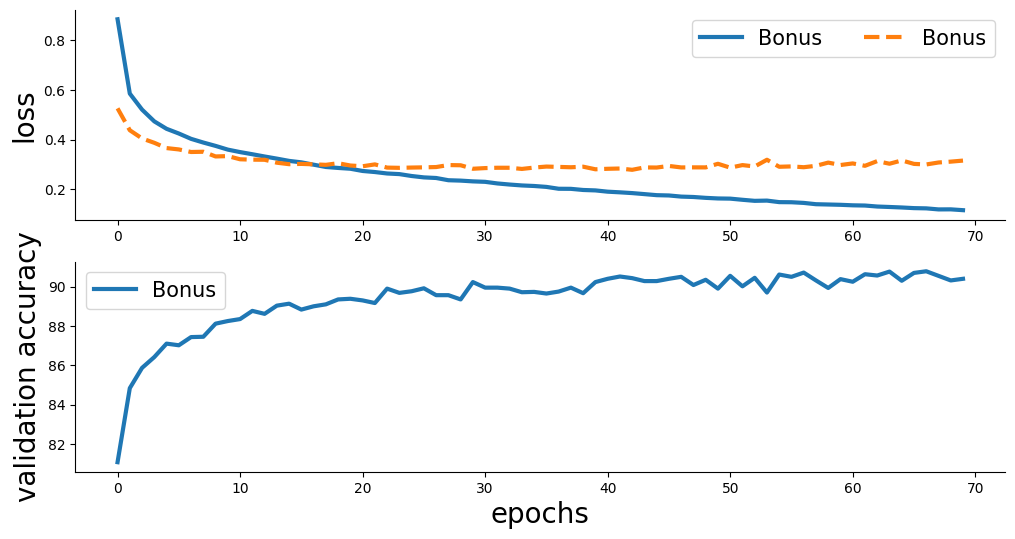

In [74]:
# extra credit! :D

# part 1: testing accuracy of >90% (fashion) and >98% (mnist)

# adam with lr .001, HeUniform start 
train, vloss, vacc, acc = bigModel([700,200,50], .0001, 70, "RMSProp", 0.15, "HeUniform", "None")

plot_curves(train, vloss, vacc, ['Bonus'])


100%|██████████| 9.91M/9.91M [00:02<00:00, 3.96MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 347kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.60MB/s]
100%|██████████| 4.54k/4.54k [00:00<?, ?B/s]
  1%|▏         | 1/70 [00:27<31:05, 27.04s/it]

Epoch: 0; Training Loss: 0.7403445578408692; Validation Accuracy:91.7%


  3%|▎         | 2/70 [00:53<30:27, 26.87s/it]

Epoch: 1; Training Loss: 0.38271723968802757; Validation Accuracy:93.48333333333333%


  4%|▍         | 3/70 [01:21<30:34, 27.38s/it]

Epoch: 2; Training Loss: 0.297344463894952; Validation Accuracy:94.66666666666667%


  6%|▌         | 4/70 [01:57<33:50, 30.76s/it]

Epoch: 3; Training Loss: 0.25185406461076915; Validation Accuracy:95.16666666666667%


  7%|▋         | 5/70 [02:19<29:42, 27.42s/it]

Epoch: 4; Training Loss: 0.2199362779282174; Validation Accuracy:95.83333333333334%


  9%|▊         | 6/70 [02:37<25:52, 24.25s/it]

Epoch: 5; Training Loss: 0.18880937473391587; Validation Accuracy:96.08333333333333%


 10%|█         | 7/70 [02:55<23:31, 22.41s/it]

Epoch: 6; Training Loss: 0.17160749674405693; Validation Accuracy:96.36666666666667%


 11%|█▏        | 8/70 [03:11<20:47, 20.13s/it]

Epoch: 7; Training Loss: 0.15355700296613406; Validation Accuracy:96.93333333333334%


 13%|█▎        | 9/70 [03:26<18:58, 18.66s/it]

Epoch: 8; Training Loss: 0.13935861054737614; Validation Accuracy:97.1%


 14%|█▍        | 10/70 [03:43<18:10, 18.18s/it]

Epoch: 9; Training Loss: 0.12936389565748987; Validation Accuracy:97.15%


 16%|█▌        | 11/70 [03:59<17:12, 17.51s/it]

Epoch: 10; Training Loss: 0.11860142092940942; Validation Accuracy:97.33333333333334%


 17%|█▋        | 12/70 [04:15<16:28, 17.04s/it]

Epoch: 11; Training Loss: 0.10864808663444699; Validation Accuracy:97.41666666666666%


 19%|█▊        | 13/70 [04:32<16:05, 16.94s/it]

Epoch: 12; Training Loss: 0.10091151771539787; Validation Accuracy:97.5%


 20%|██        | 14/70 [04:48<15:29, 16.60s/it]

Epoch: 13; Training Loss: 0.0939518976253721; Validation Accuracy:97.55%


 21%|██▏       | 15/70 [05:03<14:57, 16.31s/it]

Epoch: 14; Training Loss: 0.08711938285883868; Validation Accuracy:97.56666666666666%


 23%|██▎       | 16/70 [05:19<14:27, 16.06s/it]

Epoch: 15; Training Loss: 0.08213716028433926; Validation Accuracy:97.78333333333333%


 24%|██▍       | 17/70 [05:35<14:15, 16.15s/it]

Epoch: 16; Training Loss: 0.07443704891879603; Validation Accuracy:97.75%


 26%|██▌       | 18/70 [05:51<14:00, 16.16s/it]

Epoch: 17; Training Loss: 0.07153603817634988; Validation Accuracy:97.83333333333334%


 27%|██▋       | 19/70 [06:07<13:40, 16.08s/it]

Epoch: 18; Training Loss: 0.06639131995023421; Validation Accuracy:97.85000000000001%


 29%|██▊       | 20/70 [06:24<13:40, 16.41s/it]

Epoch: 19; Training Loss: 0.06240761241401142; Validation Accuracy:97.88333333333334%


 30%|███       | 21/70 [06:40<13:08, 16.10s/it]

Epoch: 20; Training Loss: 0.05836687727286568; Validation Accuracy:97.98333333333333%


 31%|███▏      | 22/70 [06:55<12:46, 15.97s/it]

Epoch: 21; Training Loss: 0.05389853345476232; Validation Accuracy:97.81666666666666%


 33%|███▎      | 23/70 [07:13<12:50, 16.38s/it]

Epoch: 22; Training Loss: 0.05084203538607876; Validation Accuracy:97.98333333333333%


 34%|███▍      | 24/70 [07:29<12:26, 16.23s/it]

Epoch: 23; Training Loss: 0.04918041294616348; Validation Accuracy:97.95%


 36%|███▌      | 25/70 [07:44<12:02, 16.05s/it]

Epoch: 24; Training Loss: 0.04540777564892229; Validation Accuracy:97.96666666666667%


 37%|███▋      | 26/70 [08:00<11:43, 15.98s/it]

Epoch: 25; Training Loss: 0.043235990921703146; Validation Accuracy:98.01666666666667%


 39%|███▊      | 27/70 [08:16<11:24, 15.93s/it]

Epoch: 26; Training Loss: 0.040940437993069866; Validation Accuracy:98.06666666666666%


 40%|████      | 28/70 [08:33<11:18, 16.16s/it]

Epoch: 27; Training Loss: 0.03852810785350091; Validation Accuracy:98.15%


 41%|████▏     | 29/70 [08:48<10:56, 16.00s/it]

Epoch: 28; Training Loss: 0.035474641652742646; Validation Accuracy:98.11666666666666%


 43%|████▎     | 30/70 [09:04<10:42, 16.07s/it]

Epoch: 29; Training Loss: 0.033844323521304245; Validation Accuracy:98.11666666666666%


 44%|████▍     | 31/70 [09:20<10:22, 15.95s/it]

Epoch: 30; Training Loss: 0.03186999741098229; Validation Accuracy:98.06666666666666%


 46%|████▌     | 32/70 [09:37<10:10, 16.07s/it]

Epoch: 31; Training Loss: 0.03062933914468817; Validation Accuracy:98.06666666666666%


 47%|████▋     | 33/70 [09:52<09:47, 15.88s/it]

Epoch: 32; Training Loss: 0.028235177808212785; Validation Accuracy:98.08333333333333%


 49%|████▊     | 34/70 [10:08<09:34, 15.96s/it]

Epoch: 33; Training Loss: 0.027740965254675103; Validation Accuracy:98.23333333333333%


 50%|█████     | 35/70 [10:24<09:18, 15.95s/it]

Epoch: 34; Training Loss: 0.025191233809685933; Validation Accuracy:98.16666666666667%


 51%|█████▏    | 36/70 [10:41<09:10, 16.19s/it]

Epoch: 35; Training Loss: 0.024438313946549623; Validation Accuracy:98.3%


 53%|█████▎    | 37/70 [10:56<08:46, 15.97s/it]

Epoch: 36; Training Loss: 0.023198718679541687; Validation Accuracy:98.21666666666667%


 54%|█████▍    | 38/70 [11:12<08:31, 15.98s/it]

Epoch: 37; Training Loss: 0.02094827694291214; Validation Accuracy:98.36666666666667%


 56%|█████▌    | 39/70 [11:29<08:22, 16.22s/it]

Epoch: 38; Training Loss: 0.021243891691929608; Validation Accuracy:98.11666666666666%


 57%|█████▋    | 40/70 [11:45<08:01, 16.07s/it]

Epoch: 39; Training Loss: 0.01963186416915565; Validation Accuracy:98.16666666666667%


 59%|█████▊    | 41/70 [12:02<07:55, 16.41s/it]

Epoch: 40; Training Loss: 0.018773500741687866; Validation Accuracy:98.15%


 60%|██████    | 42/70 [12:19<07:41, 16.47s/it]

Epoch: 41; Training Loss: 0.018333752525372886; Validation Accuracy:98.11666666666666%


 61%|██████▏   | 43/70 [12:34<07:19, 16.27s/it]

Epoch: 42; Training Loss: 0.01721010990396915; Validation Accuracy:98.26666666666667%


 63%|██████▎   | 44/70 [12:50<06:55, 15.98s/it]

Epoch: 43; Training Loss: 0.016356637560815183; Validation Accuracy:98.1%


 64%|██████▍   | 45/70 [13:05<06:36, 15.85s/it]

Epoch: 44; Training Loss: 0.01626208115738096; Validation Accuracy:98.3%


 66%|██████▌   | 46/70 [13:21<06:19, 15.83s/it]

Epoch: 45; Training Loss: 0.01479625940445881; Validation Accuracy:98.18333333333334%


 67%|██████▋   | 47/70 [13:38<06:11, 16.15s/it]

Epoch: 46; Training Loss: 0.014611423233049517; Validation Accuracy:98.28333333333333%


 69%|██████▊   | 48/70 [13:53<05:48, 15.83s/it]

Epoch: 47; Training Loss: 0.013219408743645786; Validation Accuracy:98.31666666666666%


 70%|███████   | 49/70 [14:09<05:34, 15.91s/it]

Epoch: 48; Training Loss: 0.013438820964129607; Validation Accuracy:98.36666666666667%


 71%|███████▏  | 50/70 [14:25<05:16, 15.85s/it]

Epoch: 49; Training Loss: 0.012107796952752221; Validation Accuracy:98.33333333333333%


 73%|███████▎  | 51/70 [14:42<05:09, 16.27s/it]

Epoch: 50; Training Loss: 0.012090775893807833; Validation Accuracy:98.3%


 74%|███████▍  | 52/70 [14:57<04:48, 16.02s/it]

Epoch: 51; Training Loss: 0.012067071379619246; Validation Accuracy:98.28333333333333%


 76%|███████▌  | 53/70 [15:13<04:30, 15.93s/it]

Epoch: 52; Training Loss: 0.011376915670896196; Validation Accuracy:98.26666666666667%


 77%|███████▋  | 54/70 [15:29<04:15, 15.97s/it]

Epoch: 53; Training Loss: 0.011023974173509006; Validation Accuracy:98.31666666666666%


 79%|███████▊  | 55/70 [15:46<04:02, 16.14s/it]

Epoch: 54; Training Loss: 0.010771726642489293; Validation Accuracy:98.31666666666666%


 80%|████████  | 56/70 [16:02<03:46, 16.18s/it]

Epoch: 55; Training Loss: 0.009694322885479778; Validation Accuracy:98.33333333333333%


 81%|████████▏ | 57/70 [16:19<03:31, 16.28s/it]

Epoch: 56; Training Loss: 0.01005014261880995; Validation Accuracy:98.26666666666667%


 83%|████████▎ | 58/70 [16:35<03:14, 16.24s/it]

Epoch: 57; Training Loss: 0.009494128766610235; Validation Accuracy:98.36666666666667%


 84%|████████▍ | 59/70 [16:51<02:57, 16.17s/it]

Epoch: 58; Training Loss: 0.008861834932347093; Validation Accuracy:98.38333333333334%


 86%|████████▌ | 60/70 [17:08<02:43, 16.39s/it]

Epoch: 59; Training Loss: 0.009830080761293054; Validation Accuracy:98.33333333333333%


 87%|████████▋ | 61/70 [17:23<02:25, 16.21s/it]

Epoch: 60; Training Loss: 0.007771741736126748; Validation Accuracy:98.11666666666666%


 89%|████████▊ | 62/70 [17:39<02:07, 15.97s/it]

Epoch: 61; Training Loss: 0.007871628448999714; Validation Accuracy:98.31666666666666%


 90%|█████████ | 63/70 [17:54<01:49, 15.69s/it]

Epoch: 62; Training Loss: 0.007927375471105202; Validation Accuracy:98.2%


 91%|█████████▏| 64/70 [18:10<01:34, 15.71s/it]

Epoch: 63; Training Loss: 0.0074733192834757125; Validation Accuracy:98.23333333333333%


 93%|█████████▎| 65/70 [18:25<01:18, 15.63s/it]

Epoch: 64; Training Loss: 0.007755489716798348; Validation Accuracy:98.28333333333333%


 94%|█████████▍| 66/70 [18:42<01:03, 15.94s/it]

Epoch: 65; Training Loss: 0.007104203670575582; Validation Accuracy:98.2%


 96%|█████████▌| 67/70 [18:57<00:47, 15.83s/it]

Epoch: 66; Training Loss: 0.006801934446041244; Validation Accuracy:98.15%


 97%|█████████▋| 68/70 [19:13<00:31, 15.92s/it]

Epoch: 67; Training Loss: 0.006666364888484888; Validation Accuracy:98.31666666666666%


 99%|█████████▊| 69/70 [19:29<00:15, 15.80s/it]

Epoch: 68; Training Loss: 0.005781867954317691; Validation Accuracy:98.48333333333333%


100%|██████████| 70/70 [19:46<00:00, 16.95s/it]

Epoch: 69; Training Loss: 0.005882089292050673; Validation Accuracy:98.18333333333334%


Mean accuracy: 0.9818359375with standard deviation: 0.00014995574951171876


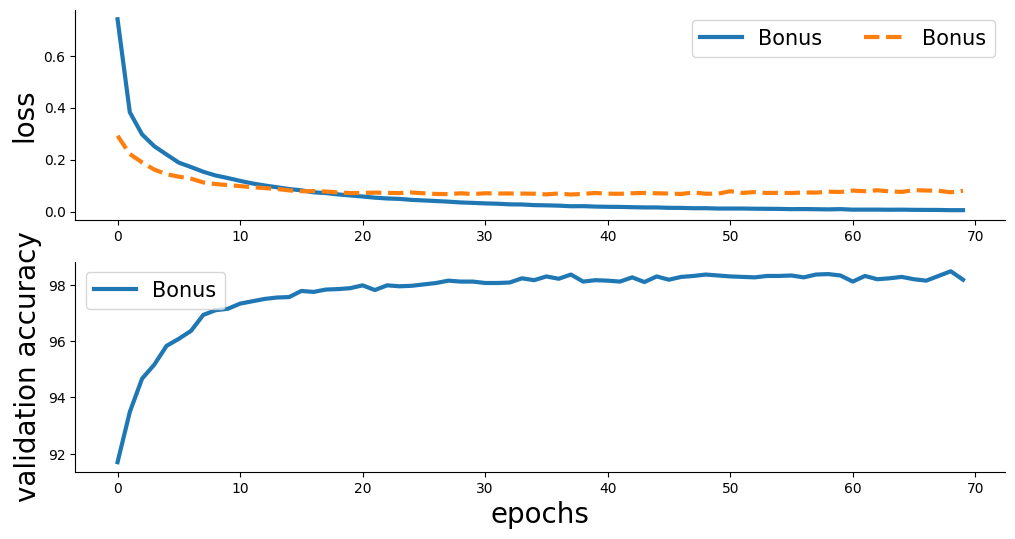

In [75]:
# another cell for doing the exact same thing but with our training crap redefined? then bigmodel?
# this will be for switching to mnist dataset 

train_dataset = torchvision.datasets.MNIST('data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

test_dataset = torchvision.datasets.MNIST('data/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))


# Use the following code to create a validation set of 10%
train_indices, val_indices, _, _ = train_test_split(
    range(len(train_dataset)),
    train_dataset.targets,
    stratify=train_dataset.targets,
    test_size=0.1,
)

# Generate training and validation subsets based on indices
train_split = Subset(train_dataset, train_indices)
val_split = Subset(train_dataset, val_indices)


# set batches sizes
train_batch_size = 512 #Define train batch size
test_batch_size  = 256 #Define test batch size (can be larger than train batch size)


# Define dataloader objects that help to iterate over batches and samples for
# training, validation and testing
train_batches = DataLoader(train_split, batch_size=train_batch_size, shuffle=True)
val_batches = DataLoader(val_split, batch_size=train_batch_size, shuffle=True)
test_batches = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=True)
                                           
num_train_batches=len(train_batches)
num_val_batches=len(val_batches)
num_test_batches=len(test_batches)

# and now repeat on the mnist data set
train, vloss, vacc, acc = bigModel([700,200,50], .0001, 70, "RMSProp", 0.15, "HeUniform", "None")

plot_curves(train, vloss, vacc, ['Bonus'])



In [77]:
# extra credit! :D

# (run before previous cell to make sure we have the right data set loaded)

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


train_features = train_dataset.data.reshape(-1, 28*28)
train_labels = train_dataset.targets

# part 2: most successful classifier from hw 3
    # that was svc (extra credit option)


clf = SVC()
clf.fit(train_features, train_labels)

print("SVC")

print("Training Score: {}".format(clf.score(train_features, train_labels)))

scores = cross_val_score(clf, train_features, train_labels, cv=5)
print("{} accuracy with a standard deviation of {}".format(scores.mean(), scores.std()))


KeyboardInterrupt: 